### Download the dataset from here ->https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery
# What is the Apriori algorithm?
Apriori uses a breadth-first search strategy to count the support of itemsets and uses a candidate generation function that exploits the downward closure property of support. We apply an iterative approach or level-wise search where k-frequent itemsets are used to find k+1 itemsets.

## Apriori Property –
All subsets of a frequent itemset must be frequent(Apriori propertry).
If an itemset is infrequent, all its supersets will be infrequent.

### **The following are the main steps of the algorithm:**
* Calculate the support of item sets (of size k = 1) in the transactional database (note that support is the frequency of occurrence of an itemset). This is called generating the candidate set.

* Prune the candidate set by eliminating items with a support less than the given threshold.

* Join the frequent itemsets to form sets of size k + 1, and repeat the above sets until no more itemsets can be formed. This will happen when the set(s) formed have a support less than​ the given support.

## Bakery Market Basket Analysis 
Market Basket Analysis is used to increase marketing effectiveness and to improve cross-sell and up-sell opportunities by making the right offer to the right customer. For a retailer, good promotions translate into increased revenue and profits. The objectives of the market basket analysis models are to identify the next product that the customer might be interested to purchase or to browse." 

Right! Before we implement the algorithm just for the sake of showing off our skills, what is our goal? As discussed previously we are here to determine up-sell opportunities. Let's start with some general questions as a framework: What sort of relationships do we wish to discover? and then, naturally: how would discovering such relationships help the business owner's bottom line? for now, let's keep these in the back of our mind.


* Can we get rid of a product 'X' because it is sold infrequently?
If the business owner wishes to get rid of a product in order to save any cost and overhead associated with it but unknowingly is getting rid of a product that is part of an item set 'X' and 'Y' where both X and Y are complements, it might not be as straightforward since it may impact other products.

## If you find this kernel usefull please UPVOTE 

# Import libraries

In [358]:
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

# Load dataset

In [359]:
df = pd.read_csv('/kaggle/input/transactions-from-a-bakery/BreadBasket_DMS.csv')

In [360]:
# first five row
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [361]:
# size of datset
df.shape

(21293, 4)

In [362]:
# summary about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [363]:
# statistical summary of numerical variables
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


# Exploratory data analysis

In [364]:
# check for missing values
df.isnull().sum() 

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [365]:
# merge date and time column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df[["Datetime", "Transaction", "Item"]]

df.head()

,Datetime,Transaction,Item
0,2016-10-30 09:58:11,1,Bread
1,2016-10-30 10:05:34,2,Scandinavian
2,2016-10-30 10:05:34,2,Scandinavian
3,2016-10-30 10:07:57,3,Hot chocolate
4,2016-10-30 10:07:57,3,Jam


In [366]:
df.dtypes

Datetime       datetime64[ns]
Transaction             int64
Item                   object
dtype: object

In [367]:
# check for unique value in items
df['Item'].value_counts().to_dict()

{'Coffee': 5471,
 'Bread': 3325,
 'Tea': 1435,
 'Cake': 1025,
 'Pastry': 856,
 'NONE': 786,
 'Sandwich': 771,
 'Medialuna': 616,
 'Hot chocolate': 590,
 'Cookies': 540,
 'Brownie': 379,
 'Farm House': 374,
 'Muffin': 370,
 'Alfajores': 369,
 'Juice': 369,
 'Soup': 342,
 'Scone': 327,
 'Toast': 318,
 'Scandinavian': 277,
 'Truffles': 193,
 'Coke': 185,
 'Spanish Brunch': 172,
 'Fudge': 159,
 'Baguette': 152,
 'Jam': 149,
 'Tiffin': 146,
 'Mineral water': 136,
 'Jammie Dodgers': 125,
 'Chicken Stew': 123,
 'Hearty & Seasonal': 107,
 'Salad': 99,
 'Frittata': 81,
 'Smoothies': 77,
 'Keeping It Local': 63,
 'The Nomad': 58,
 'Focaccia': 54,
 'Vegan mincepie': 54,
 'Bakewell': 48,
 'Tartine': 47,
 'Afternoon with the baker': 44,
 'Extra Salami or Feta': 38,
 'Art Tray': 38,
 'Granola': 28,
 'Eggs': 28,
 'Tshirt': 21,
 'My-5 Fruit Shoot': 18,
 "Ella's Kitchen Pouches": 17,
 'Vegan Feast': 16,
 'Crisps': 14,
 "Valentine's card": 13,
 'Dulce de Leche': 13,
 'Duck egg': 12,
 'Kids biscuit': 12,

#### There is 786 'NONE' , we need to remove it

In [368]:
# Remove none
df = df[df['Item'] != 'NONE']

In [369]:
# check NONE value removed or not
df[df['Item'] == 'NONE']

,Datetime,Transaction,Item


In [370]:
# Extract hour of the day and weekday of the week
# For Datetime: the day of the week are Monday=0, Sunday=6, thereby +1 to become Monday=1, Sunday=7

df['Hour'] = df['Datetime'].dt.hour

df["Weekday"] = df["Datetime"].dt.weekday + 1

df.head()

,Datetime,Transaction,Item,Hour,Weekday
0,2016-10-30 09:58:11,1,Bread,9,7
1,2016-10-30 10:05:34,2,Scandinavian,10,7
2,2016-10-30 10:05:34,2,Scandinavian,10,7
3,2016-10-30 10:07:57,3,Hot chocolate,10,7
4,2016-10-30 10:07:57,3,Jam,10,7


In [371]:
total_items = len(df)
total_days = len(np.unique(df.Datetime.dt.day))
total_months = len(np.unique(df.Datetime.dt.month))
average_items = int(total_items / total_days)
unique_items = df.Item.unique().size

print("Total unique_items: {} sold by the Bakery".format(unique_items))
print('-----------------------------')
print("Total sales: {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print('-----------------------------')
print("Average_items daily sales: {}".format(average_items))

Total unique_items: 94 sold by the Bakery
-----------------------------
Total sales: 20507 items sold in 31 days throughout 7 months
-----------------------------
Average_items daily sales: 661


In [372]:
# Rank the top 10 best-selling items
counts = df.Item.value_counts()

percent = df.Item.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

top_10 = pd.DataFrame({'counts': counts, '%': percent})

top_10.head(10)

,counts,%
Coffee,5471,26.7%
Bread,3325,16.2%
Tea,1435,7.0%
Cake,1025,5.0%
Pastry,856,4.2%
Sandwich,771,3.8%
Medialuna,616,3.0%
Hot chocolate,590,2.9%
Cookies,540,2.6%
Brownie,379,1.8%


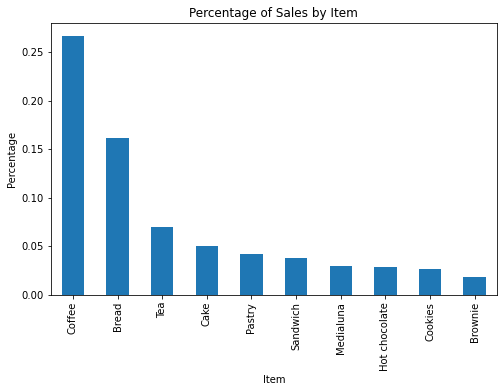

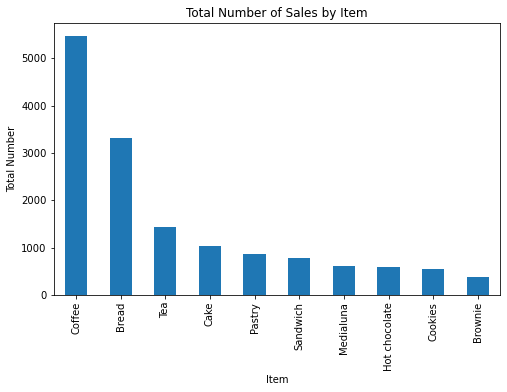

In [373]:
# Rank by percentage
plt.figure(figsize=(8,5))
df.Item.value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")
plt.show()

# Rank by value
plt.figure(figsize=(8,5))
df.Item.value_counts()[:10].plot(kind="bar", title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")
plt.show()

In [374]:
# set datetime as index 
df.set_index('Datetime', inplace=True)

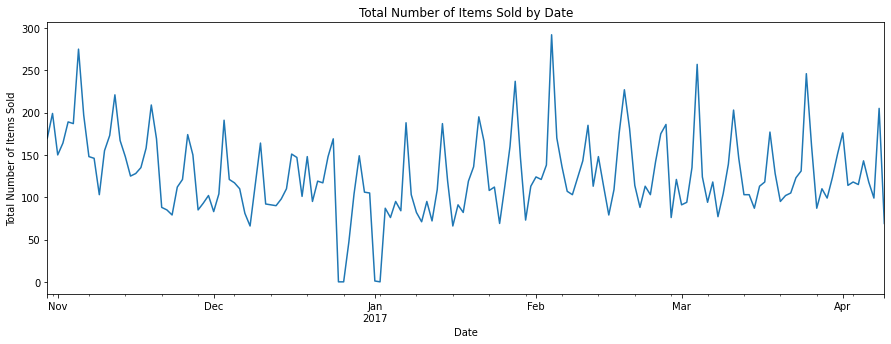

In [375]:
# Number of items sold by day
df["Item"].resample("D").count().plot(figsize=(15,5), title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")
plt.show()

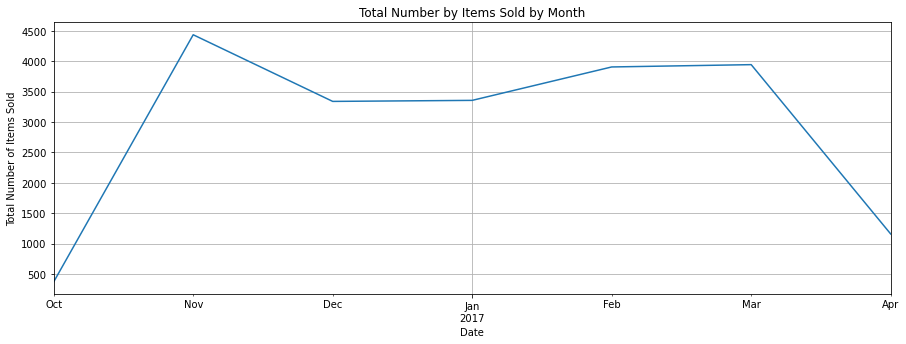

In [376]:
# Number of items sold by month
df["Item"].resample("M").count().plot(figsize=(15,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")
plt.show()

            Item
Hour            
1       0.032258
7       0.774194
8      20.806452
9      63.419355
10     86.000000
11    100.064516
12     92.064516
13     84.419355
14     85.161290
15     68.225806
16     43.322581
17     11.870968
18      2.645161
19      1.548387
20      0.709677
21      0.096774
22      0.258065
23      0.096774


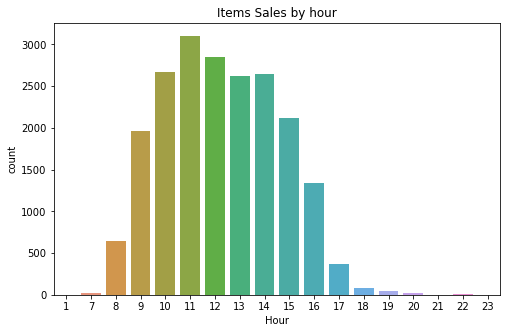

In [377]:
# Aggregate item sold by hour
df_groupby_hour = df.groupby("Hour").agg({"Item": lambda item: item.count()/total_days})
print(df_groupby_hour)

# Plot items sold by hour
plt.figure(figsize=(8,5))
sns.countplot(x='Hour',data=df)
plt.title('Items Sales by hour')
plt.show()

In [378]:
# sales groupby weekday
df_groupby_weekday = df.groupby("Weekday").agg({"Item": lambda item: item.count()})
df_groupby_weekday.head()

,Item
Weekday,
1,2324
2,2392
3,2321
4,2646
5,3124


# Modeling

In [379]:
# Define dataset to machine learning
df_basket = df.groupby(["Transaction","Item"]).size().reset_index(name="Count")

market_basket = (df_basket.groupby(['Transaction', 'Item'])['Count'].sum().unstack().reset_index().fillna(0).set_index('Transaction'))
market_basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
# Convert all of our numbers to either a 1 or a 0 (negative numbers are converted to zero, positive numbers are converted to 1)
def encode_data(datapoint):
  if datapoint <= 0:
    return 0
  else:
    return 1

In [381]:
# Process the transformation into the market_basket dataset
market_basket = market_basket.applymap(encode_data)

# Check the result
market_basket.head()

market_basket.isna().sum()

Item
Adjustment                  0
Afternoon with the baker    0
Alfajores                   0
Argentina Night             0
Art Tray                    0
                           ..
Tshirt                      0
Valentine's card            0
Vegan Feast                 0
Vegan mincepie              0
Victorian Sponge            0
Length: 94, dtype: int64

## Building the Apriori model 

### Support:
* refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions

### Confidence:

* refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought

### Lift:

* refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B)

### Leverage:

* computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent

### Conviction:

* A high conviction value means that the consequent is highly depending on the antecedent

In [385]:
# Apriori method request a min_support: Support is defined as the percentage of time that an itemset appears in the dataset.
# Defined to start seeing data/results with min_support of 2%

itemsets = apriori(market_basket, min_support= 0.02, use_colnames=True)

In [386]:
# Build your association rules using the mxltend association_rules function.
# min_threshold can be thought of as the level of confidence percentage that you want to return
# Defined to use 50% of min_threshold

rules = association_rules(itemsets, metric='lift', min_threshold=0.5)

In [387]:
# Below the list of products sales combinations
# It can use this information to build a cross-sell recommendation system that promotes these products with each other 

rules.sort_values("lift", ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
10,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
26,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
19,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
21,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
17,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705


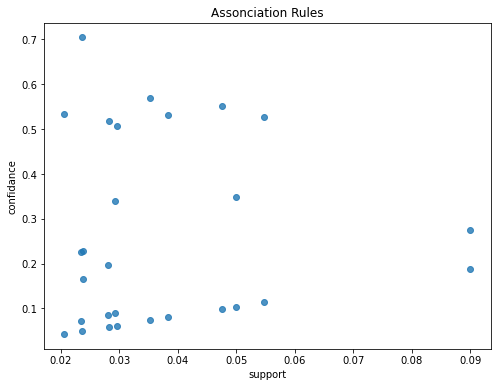

In [388]:
support = rules.support.to_numpy()
confidence = rules.confidence.to_numpy()

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.figure(figsize=(8,6))    
plt.title('Assonciation Rules')
plt.xlabel('support')
plt.ylabel('confidance')
sns.regplot(x=support, y=confidence, fit_reg=False)
plt.show()

In [389]:
# Recommendation of Market Basket
rec_rules = rules[ (rules['lift'] > 1) & (rules['confidence'] >= 0.5) ]

In [393]:
# Recommendation of Market Basket Dataset
cols_keep = {'antecedents':'item_1', 'consequents':'item_2', 'support':'support', 'confidence':'confidence', 'lift':'lift'}
cols_drop = ['antecedent support', 'consequent support', 'leverage', 'conviction']

recommendation_basket = pd.DataFrame(rec_rules).rename(columns= cols_keep).drop(columns=cols_drop).sort_values(by=['lift'], ascending = False)

display(recommendation_basket)

,item_1,item_2,support,confidence,lift
27,(Toast),(Coffee),0.023666,0.704403,1.472431
18,(Medialuna),(Coffee),0.035182,0.569231,1.189878
20,(Pastry),(Coffee),0.047544,0.552147,1.154168
16,(Juice),(Coffee),0.020602,0.534247,1.116750
22,(Sandwich),(Coffee),0.038246,0.532353,1.112792
8,(Cake),(Coffee),0.054728,0.526958,1.101515
13,(Cookies),(Coffee),0.028209,0.518447,1.083723
14,(Hot chocolate),(Coffee),0.029583,0.507246,1.060311


## If you find this kernel usefull please UPVOTE 